In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1

In [8]:
first_data = pd.read_csv('data.tsv', delimiter='\t', index_col='School')

## Data description

<ul>
    <li><b>School</b> - Contains the name of each school</li>
    <li><b>School_Type</b> - Coded 'LibArts' for liberal arts and 'Univ' for university</li>
    <li><b>SAT</b> - Median combined Math and Verbal SAT score of students</li>
    <li><b>Acceptance</b> - % of applicants accepted</li>
    <li><b>$/Student</b> - Money spent per student in dollars</li>
    <li><b>Top 10%</b> - % of students in the top 10% of their h.s. graduating class</li>
    <li><b>%PhD</b> - % of faculty at the institution that have PhD degrees</li>
    <li><b>Grad%</b> - % of students at institution who eventually graduate</li>
</ul>

In [9]:
first_data

,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
School,,,,,,,
Amherst,Lib Arts,1315,22,26636,85,81,93
Swarthmore,Lib Arts,1310,24,27487,78,93,88
Williams,Lib Arts,1336,28,23772,86,90,93
Bowdoin,Lib Arts,1300,24,25703,78,95,90
Wellesley,Lib Arts,1250,49,27879,76,91,86
Pomona,Lib Arts,1320,33,26668,79,98,80
Wesleyan (CT),Lib Arts,1290,35,19948,73,87,91
Middlebury,Lib Arts,1255,25,24718,65,89,92
Smith,Lib Arts,1195,57,25271,65,90,87


In [10]:
#Описательная статистика данных
first_data.describe(include='all')

,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Lib Arts,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1263.960000,37.840000,30247.200000,74.440000,90.560000,83.480000
std,NaN,62.329591,13.363612,15266.172682,13.515162,8.258972,7.557237
min,NaN,1109.000000,17.000000,17520.000000,47.000000,58.000000,61.000000
25%,NaN,1225.000000,25.750000,20182.250000,65.000000,86.250000,77.250000
50%,NaN,1264.000000,36.000000,24994.500000,76.500000,93.000000,85.500000
75%,NaN,1304.500000,47.750000,36803.750000,85.000000,97.750000,89.000000


<ul>
    <li>
    <p>Параметр $/Student имеет большое различие между медианой и мат.ожиданием. Mean на 20% больше медианы, что может говорить о наличии выбросов в большую сторону (что подтверждается строкой max)</p>
</li>
<li></li>
</ul>

In [11]:
#Подсчёт мод для количественных признаков
from scipy.stats import mode
s = (first_data.dtypes != 'object')
num_cols = list(s[s].index)
mds = mode(first_data[num_cols])
mds = pd.Series(mds.mode[0], index=num_cols)

In [12]:
mds

SAT            1300
Acceptance       24
$/Student     17520
Top 10%          52
%PhD             98
Grad%            88
dtype: int64

In [13]:
#Настройка графиков
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.style.use('seaborn-deep')

### Поиск и отсечение выбросов

Отсечение выбросов через z-преобразование, отсечение при |z|<3

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-pack

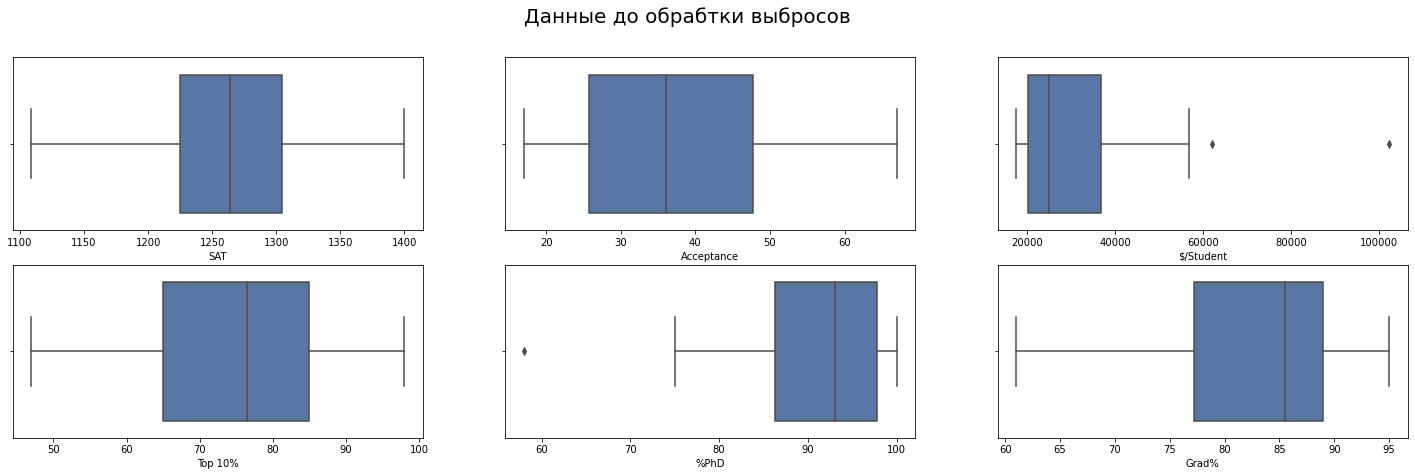

In [14]:
fig = plt.figure(figsize=(25,7))
fig.suptitle('Данные до обрабтки выбросов', fontsize=20)
for col in range(len(num_cols)):
    plt.subplot(2, 3, col + 1)
    sns.boxplot(first_data[num_cols[col]])

### Отсечение выбросов через интерквантильный размах

In [15]:
from scipy import stats
s = (first_data.dtypes != 'object')
num_cols = list(s[s].index)
for col in num_cols:
    iqr = stats.iqr(first_data[col])
    mean = np.mean(first_data[col])
    first_data = first_data[(first_data[col] > mean - 3*iqr) & (first_data[col] < mean + 3*iqr)]

### Отсечение выбросов через три сигма

In [16]:
#Отсечение через три сигма
s = (first_data.dtypes != 'object')
num_cols = list(s[s].index)
# Поиск строк, где все признаки удовлетворяют условию |z| < 3
new_data = first_data[(np.abs(stats.zscore(first_data[num_cols])) < 3).all(axis=1)]

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-pack

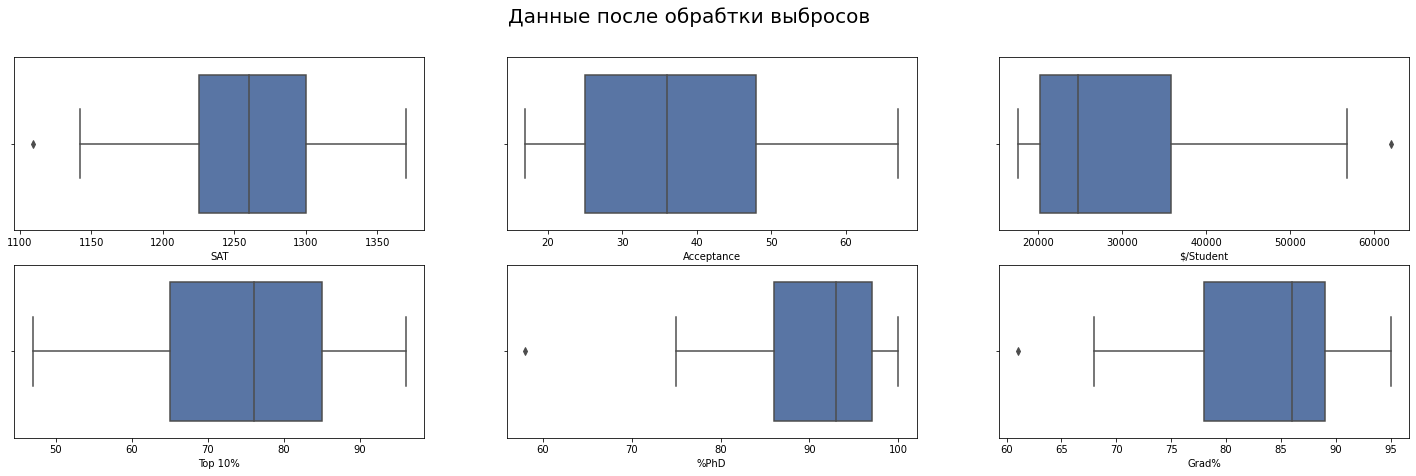

In [17]:
# Вывод данных после отсечения выбросов
fig = plt.figure(figsize=(25,7))
fig.suptitle('Данные после обрабтки выбросов', fontsize=20)
for col in range(len(num_cols)):
    plt.subplot(2, 3, col + 1)
    sns.boxplot(first_data[num_cols[col]])

(array([15.,  5.,  7.,  6.,  1.,  1.,  2.,  4.,  0.,  2.,  1.,  1.,  0.,
         1.,  1.]),
 array([-0.98163791, -0.71611548, -0.45059305, -0.18507062,  0.08045182,
         0.34597425,  0.61149668,  0.87701911,  1.14254155,  1.40806398,
         1.67358641,  1.93910884,  2.20463128,  2.47015371,  2.73567614,
         3.00119857]),
 <BarContainer object of 15 artists>)

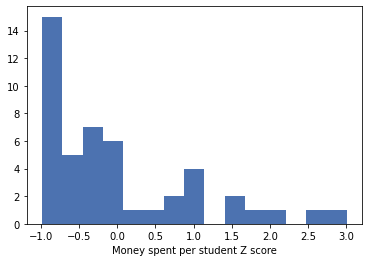

In [18]:
plt.xlabel('Money spent per student Z score')
plt.hist(stats.zscore(new_data['$/Student']), bins=15)

<b>При использовании межквартильного размаха отсекается на две записи меньше чем при использовании три сигма</b>

In [19]:
first_data.shape

(49, 7)

In [20]:
new_data.shape

(47, 7)

In [21]:
new_data.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,1263.106383,37.659574,28463.382979,73.595745,90.893617,84.085106
std,58.285368,13.651368,11268.608416,13.077793,6.808671,6.911961
min,1109.000000,17.000000,17520.000000,47.000000,75.000000,68.000000
25%,1225.000000,25.000000,20063.500000,65.000000,86.500000,79.000000
50%,1260.000000,36.000000,24201.000000,76.000000,93.000000,86.000000
75%,1303.000000,48.000000,34705.500000,85.000000,96.500000,89.500000
max,1370.000000,67.000000,61921.000000,95.000000,100.000000,95.000000




<p>Отсечение через 3 сигма в данном случае может обрезать важные точки. <br>
    
</p>

### Решение проблемы с пропусками

In [22]:
#Поиск столбцов, где хотя бы один элемент пропущен
cols_with_missing = [col for col in new_data.columns
                     if new_data[col].isnull().any()]

In [23]:
cols_with_missing

[]

In [24]:
new_data

,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
School,,,,,,,
Amherst,Lib Arts,1315,22,26636,85,81,93
Swarthmore,Lib Arts,1310,24,27487,78,93,88
Williams,Lib Arts,1336,28,23772,86,90,93
Bowdoin,Lib Arts,1300,24,25703,78,95,90
Wellesley,Lib Arts,1250,49,27879,76,91,86
Pomona,Lib Arts,1320,33,26668,79,98,80
Wesleyan (CT),Lib Arts,1290,35,19948,73,87,91
Middlebury,Lib Arts,1255,25,24718,65,89,92
Smith,Lib Arts,1195,57,25271,65,90,87


### В данном датасете отсутствуют пропуски в строках

### Взаимная корреляция

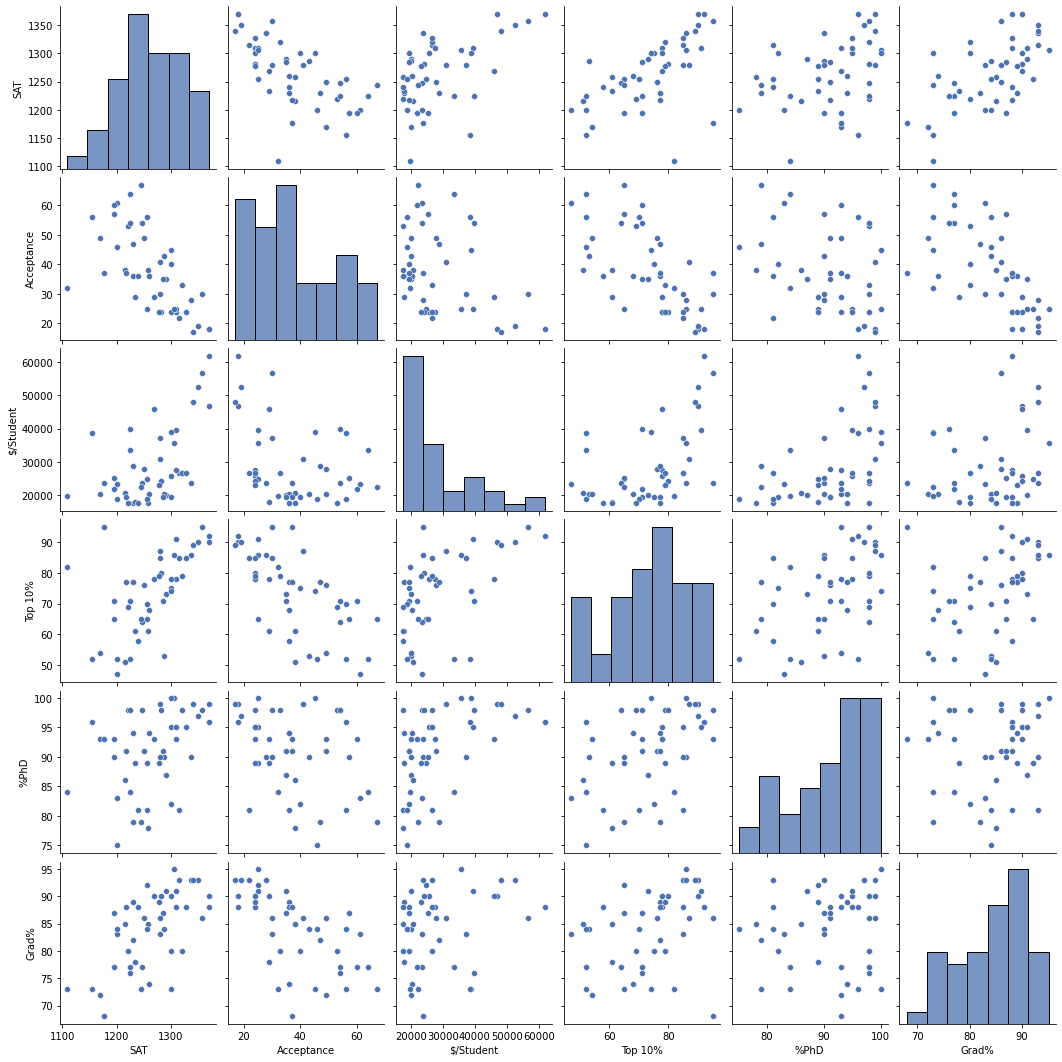

In [25]:
sns.pairplot(new_data)

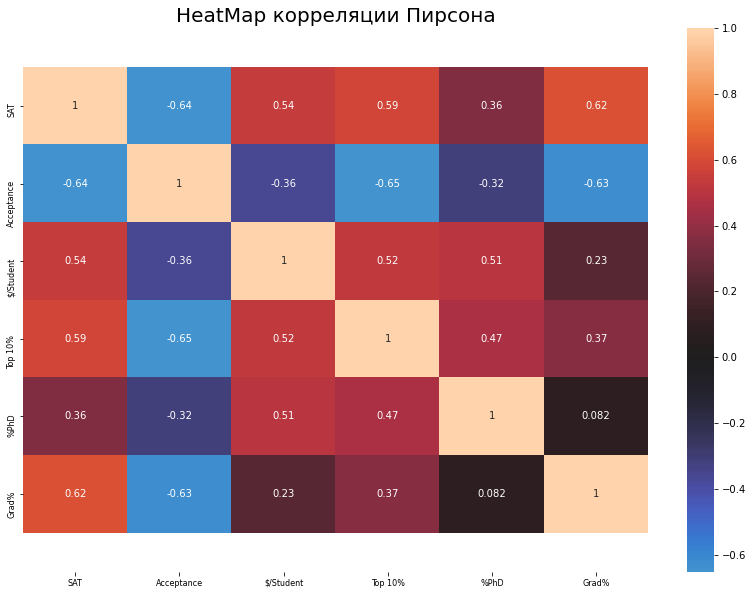

In [26]:
# Создание HeatMap для корреляции разных видов
plt.figure(figsize=(14,10))
ax = sns.heatmap(new_data.corr(), xticklabels=new_data.corr().columns, yticklabels=new_data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции Пирсона', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

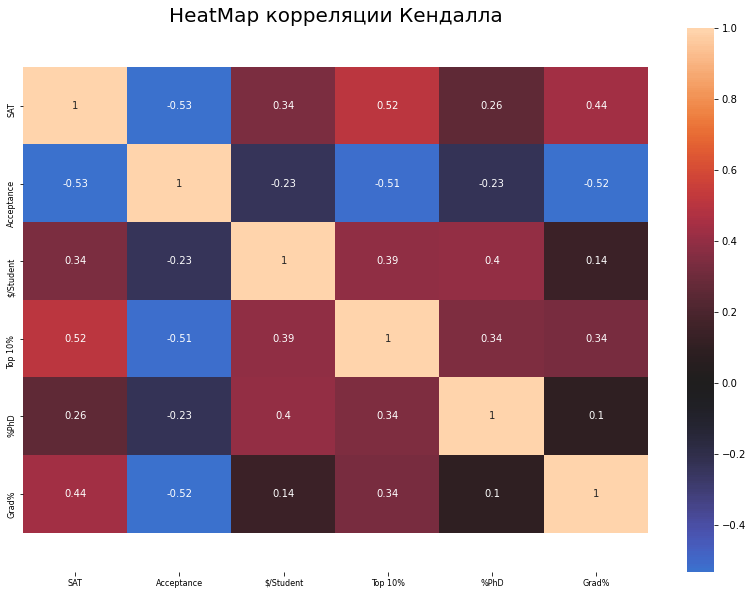

In [27]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(new_data.corr(method='kendall'), xticklabels=new_data.corr().columns, yticklabels=new_data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции Кендалла', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

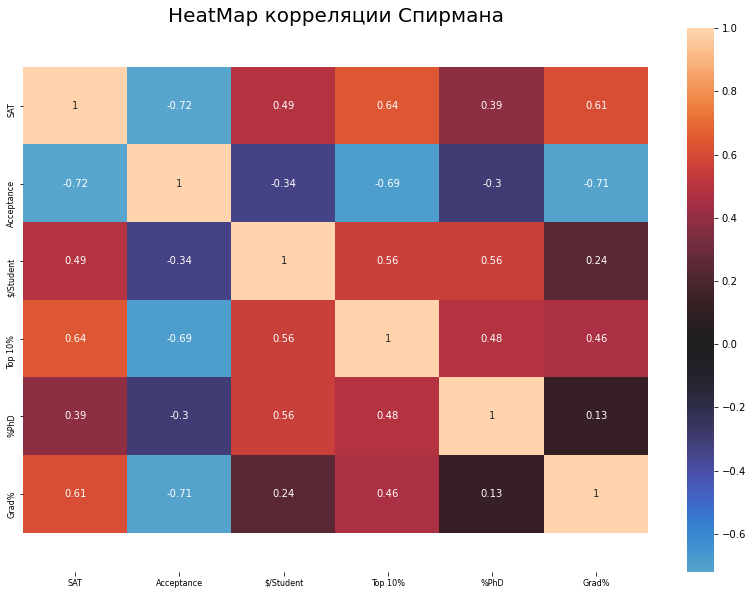

In [28]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(new_data.corr(method='spearman'), xticklabels=new_data.corr().columns, yticklabels=new_data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции Спирмана', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

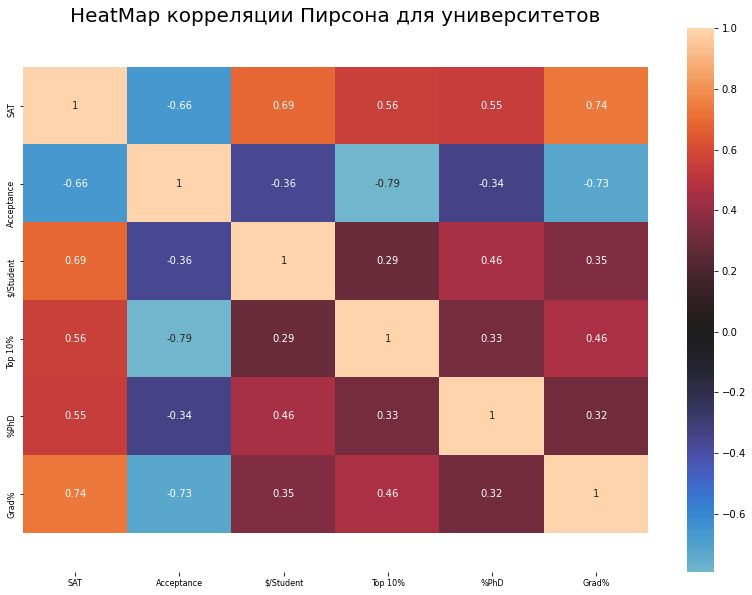

In [29]:
# Создание HeatMap для корреляции разных видов
plt.figure(figsize=(14,10))
ax = sns.heatmap(new_data[new_data['School_Type']=='Univ'].corr(), xticklabels=new_data.corr().columns, yticklabels=new_data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции Пирсона для университетов', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

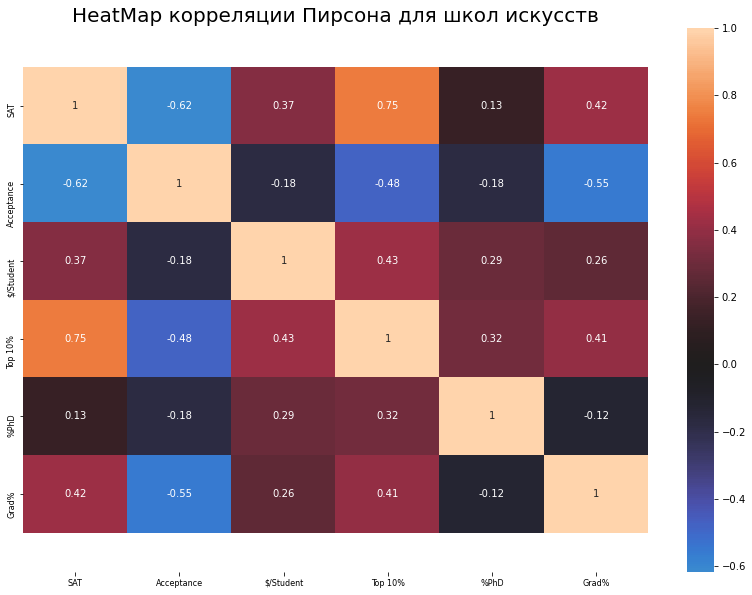

In [30]:
# Создание HeatMap для корреляции разных видов
plt.figure(figsize=(14,10))
ax = sns.heatmap(new_data[new_data['School_Type']!='Univ'].corr(), xticklabels=new_data.corr().columns, yticklabels=new_data.corr().columns, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('HeatMap корреляции Пирсона для школ искусств', fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## Выводы:

<p>Коэфциенты корреляции для графы Acceptance относительно всех остальных параметров отрицательные, отсюда вывод: по количеству общих принятых заявлений можно судить о качестве образования в заведении в целом</p>
<p></p>
<p>
    <b>Наибольшая корреляция (по модулю)</b>
<ul>
    <li><b>Кор. Пирсона: </b> -0.65 (Top 10% & Acceptance)</li>
     <li><b>Кор. Кендалла: </b> 0.52 (SAT & Top 10%) и -0.52 (Acceptance & Grad%)</li>
     <li><b>Кор. Спирмана: </b> -0.72 (SAT & Acceptance)</li>
</ul>

Если посмотреть на корреляцию по каждому из типов УЗ, видно, что для творческих заведений параметр SAT, а именно тест не имеет значения, тогда как для университетов имеет большое значение. В целом, имеет смысл рассматривать эти категории
</p>


# Задание 2

## Генерация генеральной совокупности



In [199]:
# Функция генерирует ГС из трех нормальных распредлений
# Делит ГС на три страты с долями 1/2, 1/3, 1/6
# Принимает на вход мат. ожидания и дисперсии 3 состовляющих ГС
def gen(m, d, N = 2000):
    first = stats.norm.rvs(size=N//2, loc=m[0], scale=d[0])
    second = stats.norm.rvs(size=N//3, loc=m[1], scale=d[1])
    third = stats.norm.rvs(size=N - N // 2 - N // 3, loc=m[2], scale=d[2])
    mix = np.hstack([first, second, third])
    strats = np.zeros(N)
    strats[0: N//2] = 1
    strats[N//2: N//2 + N//3] = 2
    strats[N//2 + N//3:] = 3
    data = pd.DataFrame({'strat':strats, 'GP':mix})
    return data

In [238]:
# Функция оценки параметров ГС
# Имеет три метода описанных в презентации (simple, prop, optimal)
def sample(n, data, method='simple', N = 2000):
    sigma = np.std(data['GP'])
    # Метод случайного выбора из ГС
    if method == 'simple':
        prop  = [1/2, 1/3, 1/6]
        t = data.sample(n)
        EX = np.mean(t['GP'])
        d = np.var(t['GP'])
        DX = d * (n - 1) / n * N / (N - 1)
        EDX = 0
        for i in range(1, 4):
            ni = len(t[t['strat'] == i])
            sigmaL = np.std(data[data['strat'] == i]['GP'])
            NI = len(data[data['strat'] == i])
            EDX += (prop[i-1])**2 * (1 / ni) * (1- (ni-1)/(NI - 1)) * sigmaL ** 2
    # Пропорциональное разбиение на страты
    elif method == 'prop':
        prop = [1/2, 1/3, 1/6]
        strats = ([0] * 3).copy()
        strats[0] = data[data['strat'] == 1]['GP'].sample(n//2)
        strats[1] = data[data['strat'] == 2]['GP'].sample(n//3)
        strats[2] = data[data['strat'] == 3]['GP'].sample(n - n//2 - n//3)
        m = sum([sum(strats[i]) for i in range(3)]) / n
        EX = np.mean(strats[0])/2 + np.mean(strats[1])/3 + np.mean(strats[2])/6
        d = np.var(strats[0])/2 + np.var(strats[1])/3 + np.var(strats[2])/6
        DX = d + ((m - np.mean(strats[0]))**2)/2 + ((m - np.mean(strats[1]))**2)/3 + ((m - np.mean(strats[2]))**2)/6
        EDX = 0
        for i in range(3):
            ni = prop[i] * n
            sigmaL = np.std(strats[i])
            EDX += (prop[i])**2 * (1 / ni) * (1- (ni-1)/(N * prop[i] - 1)) * sigmaL ** 2
    # Метод оптимального деления
    elif method == 'optimal':
        prop = [1/2, 1/3, 1/6]
        strats = ([0] * 3).copy()
        tmp = sum([prop[j] * np.std(data[data['strat'] == j + 1]['GP']) for j in range(3)])
        for i in range(3):
            nk = n * np.std(data[data['strat'] == i + 1]['GP']) * prop[i] / tmp
            strats[i] = data[data['strat'] == i+1]['GP'].sample(round(nk))
        m = sum([sum(strats[i]) for i in range(3)]) / n
        EX = np.mean(strats[0])/2 + np.mean(strats[1])/3 + np.mean(strats[2])/6
        d = np.var(strats[0])/2 + np.var(strats[1])/3 + np.var(strats[2])/6
        DX = d + ((m - np.mean(strats[0]))**2)/2 + ((m - np.mean(strats[1]))**2)/3 + ((m - np.mean(strats[2]))**2)/6
        EDX = 0
        for i in range(3):
            ni = prop[i] * n
            sigmaL = np.std(strats[i])
            EDX += (prop[i])**2 * (1 / ni) * (1- (ni-1)/(N * prop[i] - 1)) * sigmaL ** 2
    return [EX, DX, EDX]

### Параметры и доли распределений

<ol>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 3 <b>Доля</b> 1/2 </li>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 3 <b>Доля</b> 1/3 </li>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 3 <b>Доля</b> 1/6 </li>
</ol>

In [209]:
# data - сгенированное распредление из введенных данных
data = gen([5]*3,[3]*3)

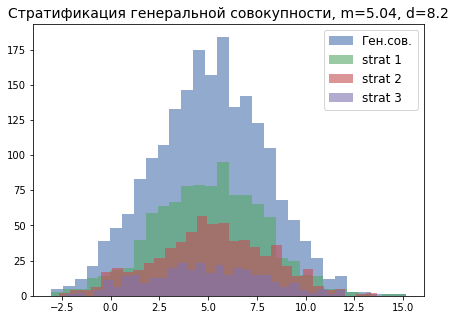

In [210]:
# Гистограмма распределения и стратификация
plt.figure(figsize=(7, 5))
plt.hist(data['GP'], bins = 30, alpha=0.6, label='Ген.сов.')
plt.hist(data[data['strat'] == 1]['GP'], bins = 30, alpha=0.6, label='strat 1')
plt.hist(data[data['strat'] == 2]['GP'], bins = 30, alpha=0.6, label='strat 2')
plt.hist(data[data['strat'] == 3]['GP'], bins = 30, alpha=0.6, label='strat 3')
plt.title("Стратификация генеральной совокупности, m=" + str(round(np.mean(data['GP']), 2))+', d='+str(round(np.var(data['GP']), 2)), fontsize=14)
plt.legend(fontsize=12)

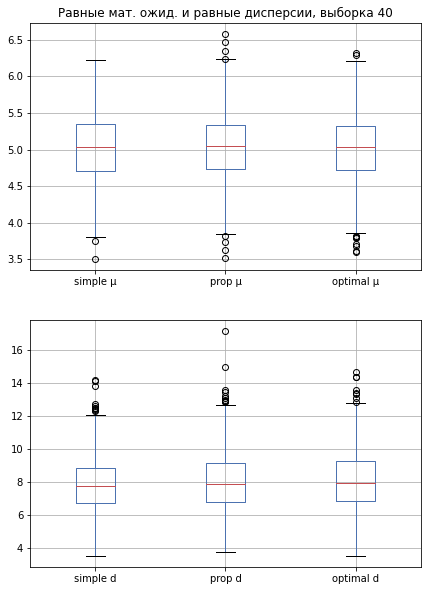

In [212]:
# Здесь и далее идет моделирование 1000 выборок из ГС
# Используются выборки 40 и 500 для каждого из трех представленных методов

result = []
for i in range(1000):
    result.append([*sample(40, data), *sample(40, data, method='prop'), *sample(40, data, method='optimal')])
result = pd.DataFrame(result)
result.columns = ['simple μ', 'simple d', 'simple var' , 'prop μ', 'prop d', 'prop var' ,'optimal μ', 'optimal d', 'optimal var']
plt.figure(figsize = (7,10))
plt.subplot(2, 1, 1)
result[['simple μ' , 'prop μ', 'optimal μ']].boxplot()
plt.title('Равные мат. ожид. и равные дисперсии, выборка 40')
plt.subplot(2, 1, 2)
result[['simple d', 'prop d', 'optimal d']].boxplot()

m = []
d = []
formula_d =[]
tmp = []
for col in ['simple μ' , 'prop μ', 'optimal μ']:
    m.append(np.mean(result[col]))
    d.append(np.var(result[col]))
    
for col in ['simple d', 'prop d', 'optimal d']:
    formula_d.append(np.mean(result[col]))
    

for col in ['simple var', 'prop var', 'optimal var']:
    tmp.append(np.mean(result[col]))

stat = pd.DataFrame([m, d, tmp, formula_d])
stat.columns = ['simple', 'prop', 'optimal']
stat.index = ['Оценка среднего', 'Дисперсия средних', 'Оценка дисперсии средних', 'Оценка дисперсии ГС']

In [213]:
stat

,simple,prop,optimal
Оценка среднего,5.030236,5.040693,5.021879
Дисперсия средних,0.195407,0.198876,0.197189
Оценка дисперсии средних,0.186549,0.186653,0.187937
Оценка дисперсии ГС,7.848769,8.019794,8.082459


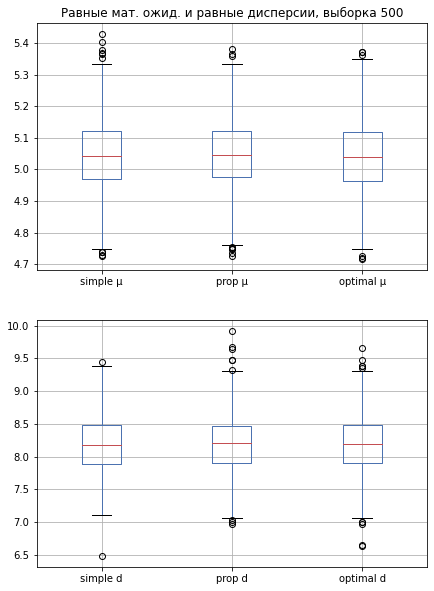

In [214]:
result = []
for i in range(1000):
    result.append([*sample(500, data), *sample(500, data, method='prop'), *sample(500, data, method='optimal')])
result = pd.DataFrame(result)
result.columns = ['simple μ', 'simple d', 'simple var' , 'prop μ', 'prop d', 'prop var' ,'optimal μ', 'optimal d', 'optimal var']
plt.figure(figsize = (7,10))

plt.subplot(2, 1, 1)
result[['simple μ' , 'prop μ', 'optimal μ']].boxplot()
plt.title('Равные мат. ожид. и равные дисперсии, выборка 500')
plt.subplot(2, 1, 2)
result[['simple d', 'prop d', 'optimal d']].boxplot()

m = []
d = []
formula_d =[]
tmp = []
for col in ['simple μ' , 'prop μ', 'optimal μ']:
    m.append(np.mean(result[col]))
    d.append(np.var(result[col]))
    
for col in ['simple d', 'prop d', 'optimal d']:
    formula_d.append(np.mean(result[col]))

for col in ['simple var', 'prop var', 'optimal var']:
    tmp.append(np.mean(result[col]))

stat = pd.DataFrame([m, d, tmp, formula_d])
stat.columns = ['simple', 'prop', 'optimal']
stat.index = ['Оценка среднего', 'Дисперсия средних', 'Оценка дисперсии средних', 'Оценка дисперсии ГС']

In [215]:
stat

,simple,prop,optimal
Оценка среднего,5.045520,5.042030,5.040740
Дисперсия средних,0.012525,0.012140,0.013037
Оценка дисперсии средних,0.012245,0.012251,0.012241
Оценка дисперсии ГС,8.185567,8.191942,8.185153


### Параметры и доли распределений

<ol>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 3 <b>Доля</b> 1/2 </li>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 4 <b>Доля</b> 1/3 </li>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 5 <b>Доля</b> 1/6 </li>
</ol>

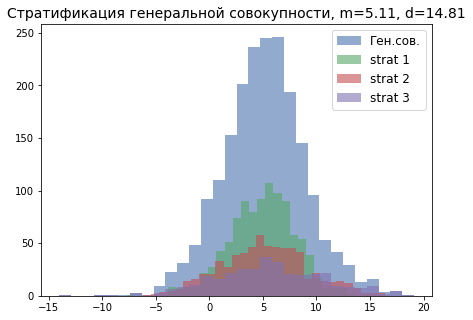

In [217]:
data = gen([5]*3,[3, 4, 5])
plt.figure(figsize=(7, 5))
plt.hist(data['GP'], bins = 30, alpha=0.6, label='Ген.сов.')
plt.hist(data[data['strat'] == 1]['GP'], bins = 30, alpha=0.6, label='strat 1')
plt.hist(data[data['strat'] == 2]['GP'], bins = 30, alpha=0.6, label='strat 2')
plt.hist(data[data['strat'] == 3]['GP'], bins = 30, alpha=0.6, label='strat 3')
plt.title("Стратификация генеральной совокупности, m=" + str(round(np.mean(data['GP']), 2))+', d='+str(round(np.var(data['GP']), 2)), fontsize=14)
plt.legend(fontsize=12)

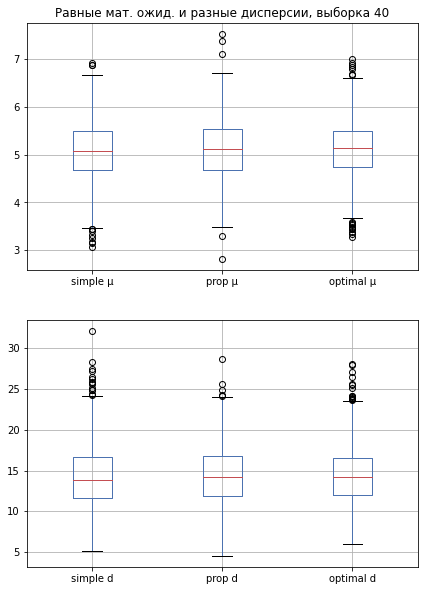

In [218]:
result = []
for i in range(1000):
    result.append([*sample(40, data), *sample(40, data, method='prop'), *sample(40, data, method='optimal')])
result = pd.DataFrame(result)
result.columns = ['simple μ', 'simple d', 'simple var' , 'prop μ', 'prop d', 'prop var' ,'optimal μ', 'optimal d', 'optimal var']
plt.figure(figsize = (7,10))

plt.subplot(2, 1, 1)
result[['simple μ' , 'prop μ', 'optimal μ']].boxplot()
plt.title('Равные мат. ожид. и разные дисперсии, выборка 40')
plt.subplot(2, 1, 2)
result[['simple d', 'prop d', 'optimal d']].boxplot()

m = []
d = []
formula_d =[]
tmp = []
for col in ['simple μ' , 'prop μ', 'optimal μ']:
    m.append(np.mean(result[col]))
    d.append(np.var(result[col]))
    
for col in ['simple d', 'prop d', 'optimal d']:
    formula_d.append(np.mean(result[col]))

for col in ['simple var', 'prop var', 'optimal var']:
    tmp.append(np.mean(result[col]))

stat = pd.DataFrame([m, d, tmp, formula_d])
stat.columns = ['simple', 'prop', 'optimal']
stat.index = ['Оценка среднего', 'Дисперсия средних', 'Оценка дисперсии средних', 'Оценка дисперсии ГС']

In [219]:
stat

,simple,prop,optimal
Оценка среднего,5.088158,5.119049,5.129980
Дисперсия средних,0.384469,0.377409,0.350015
Оценка дисперсии средних,0.332365,0.328985,0.333448
Оценка дисперсии ГС,14.244946,14.412610,14.474720


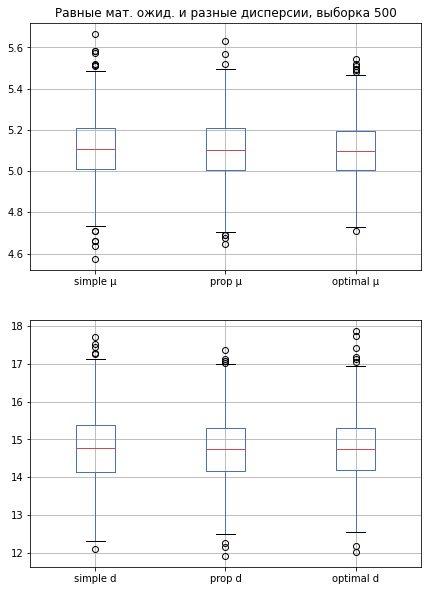

In [220]:
result = []
for i in range(1000):
    result.append([*sample(500, data), *sample(500, data, method='prop'), *sample(500, data, method='optimal')])
result = pd.DataFrame(result)
result.columns = ['simple μ', 'simple d', 'simple var' , 'prop μ', 'prop d', 'prop var' ,'optimal μ', 'optimal d', 'optimal var']
plt.figure(figsize = (7,10))

plt.subplot(2, 1, 1)
result[['simple μ' , 'prop μ', 'optimal μ']].boxplot()
plt.title('Равные мат. ожид. и разные дисперсии, выборка 500')
plt.subplot(2, 1, 2)
result[['simple d', 'prop d', 'optimal d']].boxplot()

m = []
d = []
formula_d =[]
tmp = []
for col in ['simple μ' , 'prop μ', 'optimal μ']:
    m.append(np.mean(result[col]))
    d.append(np.var(result[col]))
    
for col in ['simple d', 'prop d', 'optimal d']:
    formula_d.append(np.mean(result[col]))

for col in ['simple var', 'prop var', 'optimal var']:
    tmp.append(np.mean(result[col]))

stat = pd.DataFrame([m, d, tmp, formula_d])
stat.columns = ['simple', 'prop', 'optimal']
stat.index = ['Оценка среднего', 'Дисперсия средних', 'Оценка дисперсии средних', 'Оценка дисперсии ГС']

In [221]:
stat

,simple,prop,optimal
Оценка среднего,5.109643,5.104424,5.102865
Дисперсия средних,0.023488,0.022092,0.020306
Оценка дисперсии средних,0.022041,0.021968,0.022015
Оценка дисперсии ГС,14.782250,14.731179,14.753874


### Параметры и доли распределений

<ol>
    <li><b>μ</b> = 5 <b>σ<sup>2</sup></b> = 3 <b>Доля</b> 1/2 </li>
    <li><b>μ</b> = 10 <b>σ<sup>2</sup></b> = 4 <b>Доля</b> 1/3 </li>
    <li><b>μ</b> = 15 <b>σ<sup>2</sup></b> = 5 <b>Доля</b> 1/6 </li>
</ol>

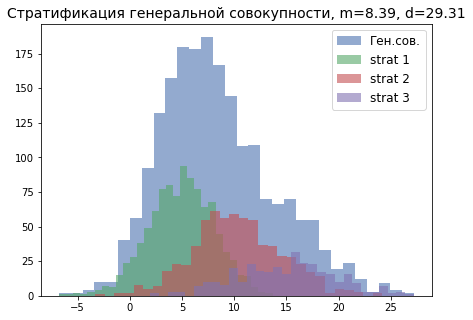

In [239]:
data = gen([5, 10, 15],[3, 4, 5])
plt.figure(figsize=(7, 5))
plt.hist(data['GP'], bins = 30, alpha=0.6, label='Ген.сов.')
plt.hist(data[data['strat'] == 1]['GP'], bins = 30, alpha=0.6, label='strat 1')
plt.hist(data[data['strat'] == 2]['GP'], bins = 30, alpha=0.6, label='strat 2')
plt.hist(data[data['strat'] == 3]['GP'], bins = 30, alpha=0.6, label='strat 3')
plt.title("Стратификация генеральной совокупности, m=" + str(round(np.mean(data['GP']), 2))+', d='+str(round(np.var(data['GP']), 2)), fontsize=14)
plt.legend(fontsize=12)


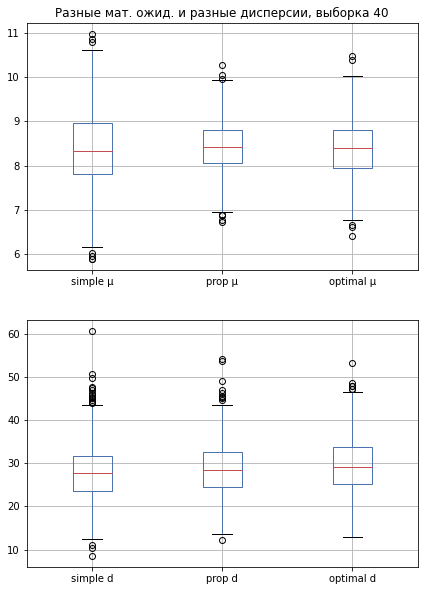

In [240]:
result = []
for i in range(1000):
    result.append([*sample(40, data), *sample(40, data, method='prop'), *sample(40, data, method='optimal')])
result = pd.DataFrame(result)
result.columns = ['simple μ', 'simple d', 'simple var' , 'prop μ', 'prop d', 'prop var' ,'optimal μ', 'optimal d', 'optimal var']
plt.figure(figsize = (7,10))

plt.subplot(2, 1, 1)
result[['simple μ' , 'prop μ', 'optimal μ']].boxplot()
plt.title('Разные мат. ожид. и разные дисперсии, выборка 40')
plt.subplot(2, 1, 2)
result[['simple d', 'prop d', 'optimal d']].boxplot()

m = []
d = []
formula_d =[]
tmp = []
for col in ['simple μ' , 'prop μ', 'optimal μ']:
    m.append(np.mean(result[col]))
    d.append(np.var(result[col]))
    
for col in ['simple d', 'prop d', 'optimal d']:
    formula_d.append(np.mean(result[col]))

for col in ['simple var', 'prop var', 'optimal var']:
    tmp.append(np.mean(result[col]))

stat = pd.DataFrame([m, d, tmp, formula_d])
stat.columns = ['simple', 'prop', 'optimal']
stat.index = ['Оценка среднего', 'Дисперсия средних', 'Оценка дисперсии средних', 'Оценка дисперсии ГС']

In [241]:
stat

,simple,prop,optimal
Оценка среднего,8.367733,8.433805,8.392420
Дисперсия средних,0.674812,0.335924,0.384829
Оценка дисперсии средних,0.392015,0.327841,0.336076
Оценка дисперсии ГС,28.090834,28.698127,29.625742


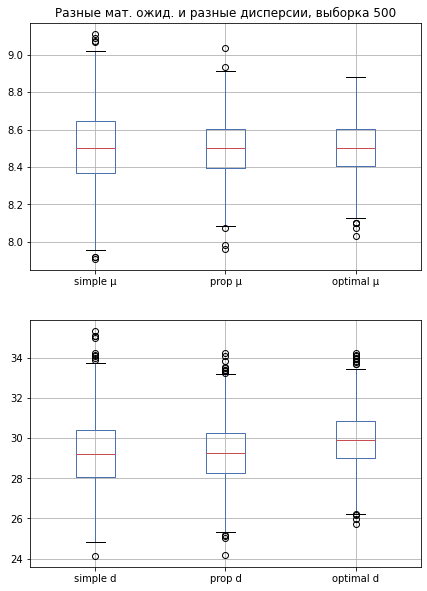

In [236]:
result = []
for i in range(1000):
    result.append([*sample(500, data), *sample(500, data, method='prop'), *sample(500, data, method='optimal')])
result = pd.DataFrame(result)
result.columns = ['simple μ', 'simple d', 'simple var' , 'prop μ', 'prop d', 'prop var' ,'optimal μ', 'optimal d', 'optimal var']
plt.figure(figsize = (7,10))
plt.subplot(2, 1, 1)
result[['simple μ' , 'prop μ', 'optimal μ']].boxplot()
plt.title('Разные мат. ожид. и разные дисперсии, выборка 500')
plt.subplot(2, 1, 2)
result[['simple d', 'prop d', 'optimal d']].boxplot()

m = []
d = []
formula_d =[]
tmp = []
for col in ['simple μ' , 'prop μ', 'optimal μ']:
    m.append(np.mean(result[col]))
    d.append(np.var(result[col]))
    
for col in ['simple d', 'prop d', 'optimal d']:
    formula_d.append(np.mean(result[col]))

for col in ['simple var', 'prop var', 'optimal var']:
    tmp.append(np.mean(result[col]))

stat = pd.DataFrame([m, d, tmp, formula_d])
stat.columns = ['simple', 'prop', 'optimal']
stat.index = ['Оценка среднего', 'Дисперсия средних', 'Оценка дисперсии средних', 'Оценка дисперсии ГС']

In [237]:
stat

,simple,prop,optimal
Оценка среднего,8.502970,8.500377,8.502179
Дисперсия средних,0.042630,0.023822,0.020174
Оценка дисперсии средних,0.022043,0.021921,0.021975
Оценка дисперсии ГС,29.268616,29.325886,29.935443


# Выводы

# Задание 3

### Создание синтетических данных

Создается два распредления, из смеси двух нормально распред. ГС, в первом случае преобладает ГС, с m = 4, во втором m = 10. <br>
При проверке гипотез, они будут формироваться относительно этих параметров

In [53]:
mix = np.hstack([stats.norm.rvs(size=200, loc=4, scale=5), stats.norm.rvs(size=100, loc=10, scale=2)])
mix_alternative = np.hstack([stats.norm.rvs(size=200, loc=10, scale=5), stats.norm.rvs(size=100, loc=4, scale=2)])

In [112]:
def sprt(data, sigma, h0, h1, alpha=0.05, beta=0.2):
    a = np.log(beta/(1-alpha))
    b = np.log((1 - beta)/alpha)
    s = 0
    i = 0
    while s > a and s < b and i < len(data):
        s += (h0 - h1)*(2 * data[i] - h0 - h1) / (2 * sigma ** 2)
        i += 1
    print('Шагов потребовалось', i)
    if s < a:
        return 'H0 принимается'
    elif s > b:
        return 'H1 принимается'
    else:
        return 'Продолжить мониторинг'
    

<b>H0</b> - ГС представлена нормальным распредлением с параметрами a = 4, sigma = 15 <br>
<b>H1</b> - ГС представлена нормальным распредлением с параметрами a = 10, sigma = 15 <br>

(в условии задачи, сказано, что дисперсия изначально известна)

7.307413044656844


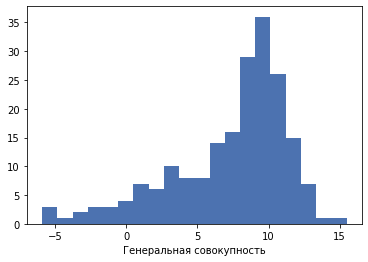

In [133]:
plt.xlabel('Генеральная совокупность')
plt.hist(mix, bins = 20)
print(np.mean(mix))

6.860024247623478


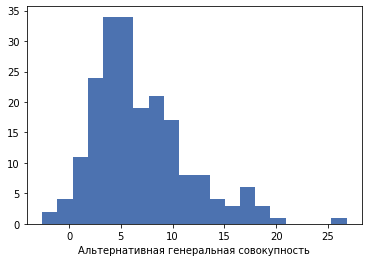

In [134]:
plt.xlabel('Альтернативная генеральная совокупность')
plt.hist(mix_alternative, bins = 20)
print(np.mean(mix_alternative))

In [131]:
h0 = 4
h1 = 10
sigma = 15
sprt(mix, sigma, h0, h1)

Шагов потребовалось 19


'H1 принимается'

In [ ]:
def E(alpha, beta, h0, h1, sigma):
    w = (1 - alpha) * np.log((1 - alpha)/beta) + alpha * np.log(alpha/(1-beta))
    

### Выводы

Чем ближе h0 к истинному значению тем меньше шагов нужно алгоритму чтобы принять гипотезу<br>
Изначально критерий бета (ошибка II рода), больше чем альфа (ошибка I рода), поэтому в нулевая гипотеза в случае небольшой разницы мжду H0 и H1 может неверно отвергаться <br>
Алгоритм при данных условиях вероятнее совершит ошибку первого рода, чем ошибку второго рода


# Задание 4

## Проверка гипотезы для коэффициента корреляции

In [80]:
brain = pd.read_csv('brain.tsv', delimiter='\t')
carprefs = pd.read_csv('carprefs.tsv', delimiter='\t')

In [81]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


<Figure size 1080x360 with 0 Axes>

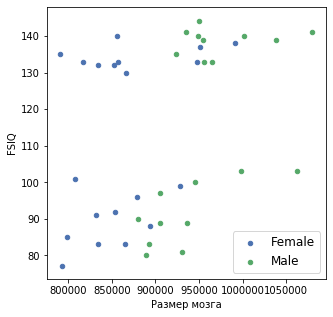

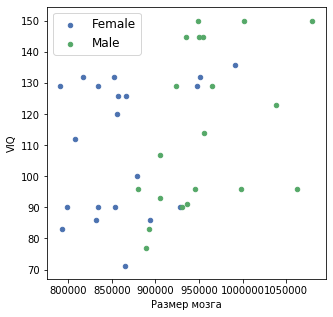

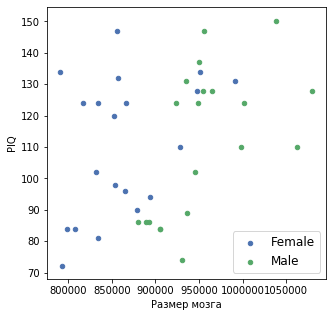

In [82]:
# График корреляции IQ и размера мозга с разбиением по половому признаку
import warnings
warnings.filterwarnings('ignore')
cats = np.unique(brain['Gender'])
colors = [plt.cm.tab10(i/float(len(cats)-1)) for i in range(len(cats))]
plt.figure(figsize=(15,5))
headers = ['FSIQ', 'VIQ', 'PIQ']
for j in range(3):
    plt.figure(figsize=(17,5))
    plt.subplot(1, 3, j+1)
    for i, cat in enumerate(cats):
        plt.scatter('MRI_Count', headers[j], data = brain.loc[brain.Gender==cat, :], s=20, label=str(cat))
    plt.xlabel('Размер мозга')
    plt.ylabel(headers[j])
    plt.legend(fontsize=12)
    plt.show()

<b>H0</b> - корреляция есть <br>
<b>H1</b> - корреляции нет

In [84]:
# Критерий Фишера
def f1(x, y, a):
    x_m = np.mean(x)
    y_m = np.mean(y)
    r = sum((x-x_m)*(y-y_m))
    r /= sum((x-x_m) ** 2) ** 0.5
    r /= sum((y-y_m) ** 2) ** 0.5
    t = r/(1-r**2)**0.5 * (len(x)-2)**0.5
    t1 = stats.t.ppf(1 - a, len(x)-2)
    if abs(t) > abs(t1):
        return 'Отвергаем H0'
    else:
        return 'Не отвергаем H0'

### Выборка без разделения по полу

In [85]:
f1(brain['FSIQ'], brain['MRI_Count'], 0.95)

'Отвергаем H0'

In [86]:
f1(brain['VIQ'], brain['MRI_Count'], 0.95)

'Отвергаем H0'

In [87]:
f1(brain['PIQ'], brain['MRI_Count'], 0.95)

'Отвергаем H0'

## Вывод

Во всех трех случаях H0 отвергается. Если корреляция все таки есть, вероятность существования такой выборки менее 0.05

In [92]:
men_brain = brain[brain['Gender']=='Male']
women_brain = brain[brain['Gender']=='Female']

### Выборка по мужскому полу

In [93]:
f1(men_brain['FSIQ'], men_brain['MRI_Count'], 0.95)

'Отвергаем H0'

In [94]:
f1(men_brain['VIQ'], men_brain['MRI_Count'], 0.95)

'Отвергаем H0'

In [95]:
f1(men_brain['PIQ'], men_brain['MRI_Count'], 0.95)

'Отвергаем H0'

### Выборка по женскому полу

In [102]:
f1(women_brain['FSIQ'], women_brain['MRI_Count'], 0.95)

'Не отвергаем H0'

In [103]:
f1(women_brain['VIQ'], women_brain['MRI_Count'], 0.95)

'Не отвергаем H0'

In [98]:
f1(women_brain['PIQ'], women_brain['MRI_Count'], 0.95)

'Отвергаем H0'

### Вывод

Выборка относительно полов тоже не несет ценной информации о наличии корреляции, даже в случаях, где 0-ая гипотеза принимается p-value сильно выше 0.05

## Критерий Хи-квадрат

In [19]:
carprefs.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In [20]:
np.unique(carprefs.PreferCar)

array([1, 2, 3, 4], dtype=int64)

In [104]:
# Создание сводной таблицы с помощью pandas
from scipy.stats import chi2_contingency
table = pd.crosstab(carprefs['Sex'], carprefs['PreferCar'])
stat, p, dof, expected = chi2_contingency(table)

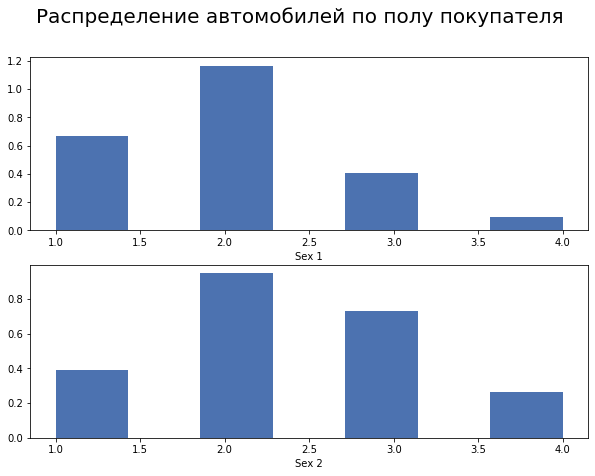

In [105]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('Распределение автомобилей по полу покупателя', fontsize=20)
for i in range(1, 3):
    plt.subplot(2, 1, i)
    plt.hist(carprefs[carprefs['Sex']==i]['PreferCar'],bins=7, normed=1)
    plt.xlabel('Sex ' + str(i))
plt.show()

In [106]:
p

0.0005555699275518034

P уровень значимости < 0.05

H0 - не принимается

<br>

Если корреляция существует, данная выборка существует с вероятностью менее 0.05 

In [ ]:
Ellastic net, SRV